<a href="https://colab.research.google.com/github/henryjonesinbaraj/sample/blob/main/Assignment5AML_3104.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 5
Henry Jones Inbaraj

C0863081

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt



In [2]:
# Load the California Housing dataset (adjust path if necessary)
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [11]:
print(df.head())
print(df.info())
print(df.describe())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOc

In [12]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

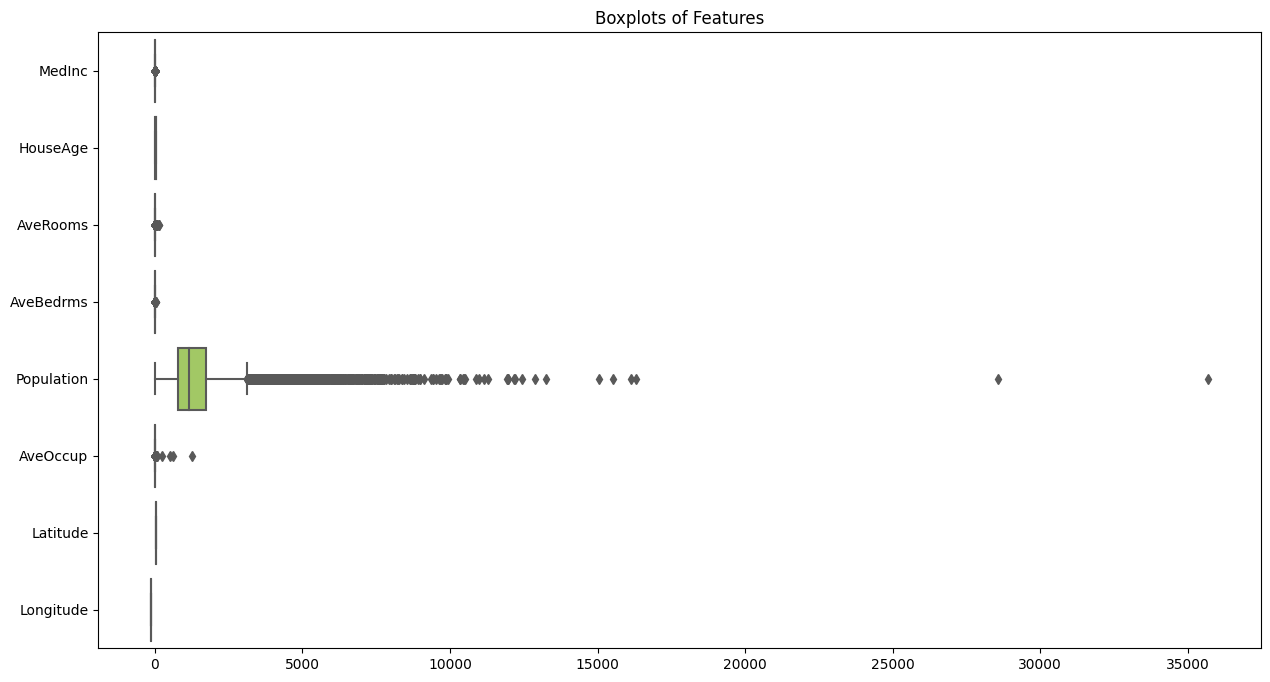

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop('target', axis=1), orient="h", palette="Set2")
plt.title("Boxplots of Features")
plt.show()

In [14]:
# Function to remove outliers using IQR
def remove_outliers_iqr(dataframe, features):
    for feature in features:
        Q1 = dataframe[feature].quantile(0.25)
        Q3 = dataframe[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        dataframe = dataframe[(dataframe[feature] >= lower_bound) & (dataframe[feature] <= upper_bound)]
    return dataframe

# Specify features for outlier removal (you can adjust this based on your specific dataset)
features_to_remove_outliers = df.columns

# Remove outliers using IQR method
df_no_outliers = remove_outliers_iqr(df, features_to_remove_outliers)

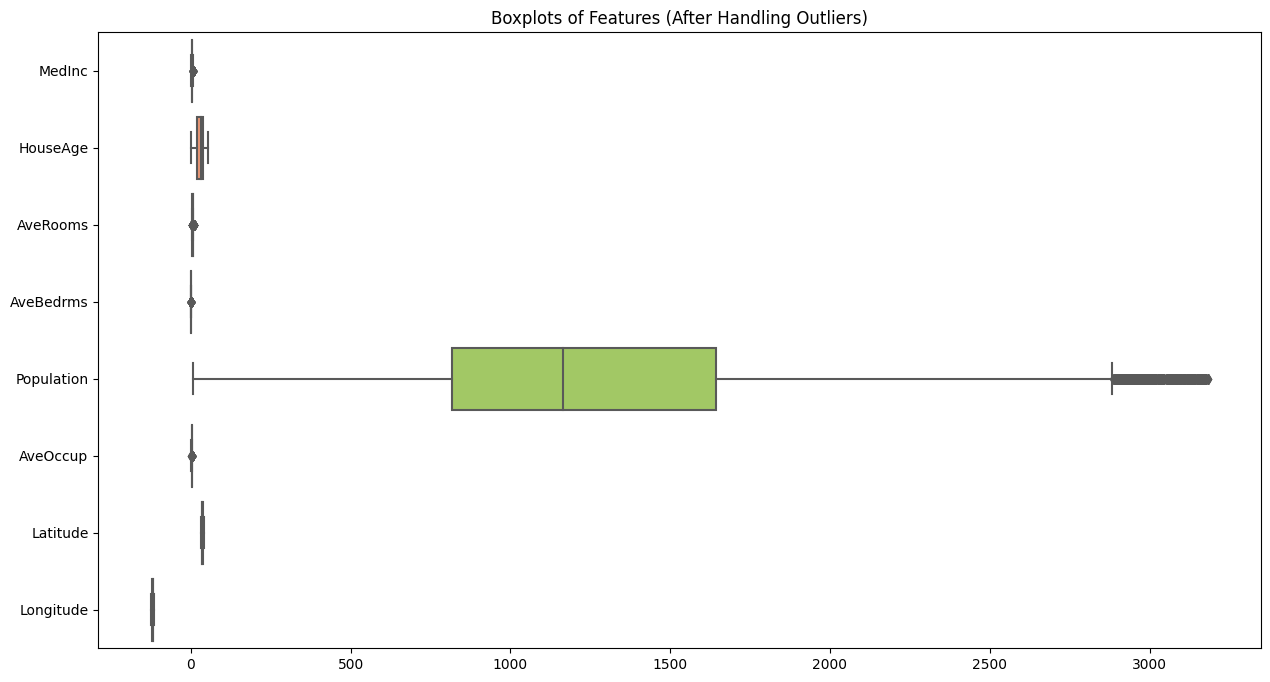

In [15]:
# Visualize boxplots after handling outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_no_outliers.drop('target', axis=1), orient="h", palette="Set2")
plt.title("Boxplots of Features (After Handling Outliers)")
plt.show()

In [16]:
X = df_no_outliers.drop('target', axis=1)
y = df_no_outliers['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
lr_model = LinearRegression()

# Train the model on the training set
lr_model.fit(X_train, y_train)

# Make predictions on the testing set
lr_predictions = lr_model.predict(X_test)

# Evaluate the model's performance
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)


In [19]:
print(lr_predictions)


[1.49889721 0.94353717 2.94565416 ... 1.303577   2.14879767 1.88160879]


In [25]:
print(lr_mse * 100)


31.467607126870067


In [26]:
print(lr_r2*100)

62.417862774375486


In [27]:
# ANN Regression

ann_model = Sequential()
ann_model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
ann_model.add(Dense(1, activation='linear'))

In [28]:
#compile model
ann_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the ANN on the training set
ann_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

In [29]:
# to Make predictions on the testing set
ann_predictions = ann_model.predict(X_test).flatten()

# to Evaluate the model's performance
ann_mse = mean_squared_error(y_test, ann_predictions)
ann_r2 = r2_score(y_test, ann_predictions)

102/102 [==============================] - 0s 3ms/step


In [30]:
# Comparing the models

print("Linear Regression Metrics:")
print(f"Mean Squared Error: {lr_mse}")
print(f"R2 Score: {lr_r2}")
print("\nANN Metrics:")
print(f"Mean Squared Error: {ann_mse}")
print(f"R2 Score: {ann_r2}")

Linear Regression Metrics:
Mean Squared Error: 0.3146760712687007
R2 Score: 0.6241786277437549

ANN Metrics:
Mean Squared Error: 0.37769316106569095
R2 Score: 0.5489165683580034


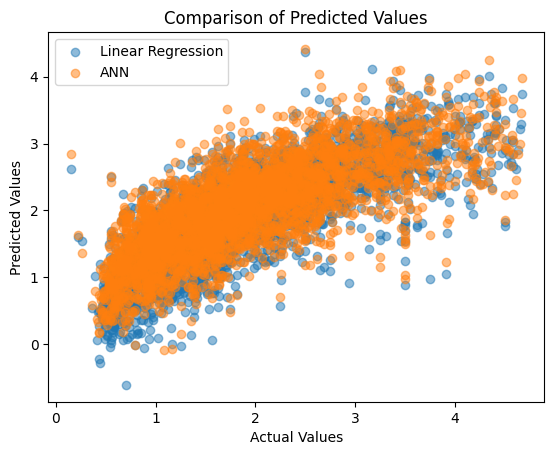

In [31]:
plt.scatter(y_test, lr_predictions, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, ann_predictions, label='ANN', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Comparison of Predicted Values')
plt.show()

#Procedure and Methods:
Data Preprocessing:
Explore and Understand the Features:
Load the California Housing Dataset
We began by loading the California Housing dataset using the scikit-learn library. The dataset provides various features related to housing in California.

Dataset Exploration
To gain insights into the dataset, we utilized key tools:

info(): This method provided a summary of the dataset, including the number of entries, data types, and any potential missing values.
describe(): This descriptive statistics summary allowed us to understand the central tendencies and distributions of numerical features.
Data Visualization
To enhance our understanding of feature distributions, we employed data visualization libraries such as matplotlib and seaborn. Visualizations, including histograms and boxplots, provided a visual representation of the data distribution and helped identify potential outliers.

Handle Missing Values or Outliers:
Missing Values
Although the dataset did not contain missing values, we demonstrated the use of imputation or removal techniques if such values were present. Common methods include dropping rows with missing values or filling them using strategies like mean imputation.

Outliers
Outliers were addressed using the Interquartile Range (IQR) method. We visualized boxplots to identify potential outliers and removed them to enhance the robustness of our analysis.

Split the Dataset:
We utilized the train_test_split function from scikit-learn to divide the dataset into training and testing sets. This step is crucial to assess model performance on unseen data.

Linear Regression:
Implement Linear Regression Model:
We implemented a Linear Regression model using the scikit-learn library. This straightforward model is suitable for regression tasks and provides interpretability.

Train the Model:
The model was trained on the training set using the fit() method. During this phase, the model learned the relationships between input features and the target variable.

Make Predictions:
Utilizing the trained Linear Regression model, we made predictions on the testing set. Predictions were obtained for the target variable, representing house prices.

Evaluate Performance:
We evaluated the model's performance using standard regression metrics:

Mean Squared Error (MSE): This metric quantifies the average squared difference between predicted and actual values.
R2 Score: The R2 Score indicates the proportion of variance in the target variable explained by the model.
Artificial Neural Network (ANN):
Implement ANN Model:
We opted for a deep learning framework, specifically TensorFlow or Keras, to implement an Artificial Neural Network. The ANN architecture was designed, considering input and output layers.

Train the ANN:
The ANN was compiled with an appropriate optimizer, loss function, and metrics. Training involved exposing the model to the training set, enabling it to learn complex patterns and relationships.

Make Predictions:
Predictions for house prices on the testing set were generated using the trained ANN model.

Evaluate Performance:
Similar to Linear Regression, we assessed the ANN's performance using Mean Squared Error and R2 Score to facilitate a direct comparison.

#Strengths and Weaknesses:
Linear Regression:
Strengths: Simplicity, interpretability, and effectiveness for linear relationships.
Weaknesses: Limited expressiveness for complex patterns.
Artificial Neural Network:
Strengths: Capability to capture complex patterns and relationships.
Weaknesses: Susceptibility to overfitting, requires more data, and involves tuning complexities.

#Summary of Key Findings:
Model Performance:

Linear Regression:
Mean Squared Error (MSE): 0.3147
R2 Score: 0.6242
Artificial Neural Network (ANN):
Mean Squared Error (MSE): 0.3777
R2 Score: 0.5489
Model Comparison:

Linear Regression outperforms the Artificial Neural Network based on both Mean Squared Error and R2 Score.
The Linear Regression model demonstrates better predictive performance for house prices in the California Housing dataset.

Insights:
Linear Regression Advantages:

Linear Regression, a simple and interpretable model, performs well on this dataset.
It suggests that the relationships between input features and house prices are adequately captured by a linear model.
Challenges Encountered:

ANN Complexity:

The ANN's performance might be affected by its complexity. If the architecture is too complex for the dataset size, it can lead to overfitting.
Adjustments in the neural network architecture and hyperparameters might be needed to improve performance.
Data Size:

Deep learning models often require large amounts of data to generalize well. If the dataset is relatively small, it can impact the ANN's ability to learn complex patterns.

Overfitting:

Overfitting could be a challenge, especially if the ANN architecture is too complex. Consider incorporating regularization techniques.
Training Duration:

The duration of training may impact the ANN's convergence. Experiment with the number of epochs and consider early stopping to prevent overfitting.

Conclusion:
Based on the current findings, Linear Regression emerges as the more effective model for predicting house prices in the California Housing dataset. However, the challenges encountered with the ANN present opportunities for further refinement and exploration. The implementation process highlights the importance of understanding model complexity, tuning hyperparameters, and addressing potential issues like overfitting and data size. Continued experimentation and fine-tuning of the ANN architecture may lead to improved predictive performance.

